<a href="https://colab.research.google.com/github/melisa9999/Scraping/blob/main/TT_country_ranking.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
import requests
from bs4 import BeautifulSoup

URL = 'https://www.ittf.com/2021-ittf-table-tennis-world-ranking/'
page = requests.get(URL)  # se trae la información de la URL
soup = BeautifulSoup(page.content, 'html.parser') #se crea el objeto que contiene todo el código HTLM
#print(soup.prettify()) #permite imprimir el código en el formato correcto

In [132]:
#1. Obtener una lista con los links que conducen al ranking masculino de cada semana
main_content= soup.find(class_="container main-content")
week_info = main_content.find_all(class_="col-xs-12")
link_per_week_list= [week_info[1].find_all('li')[::8][i].find('a', href=True)['href'] for i in range(10)]


In [133]:
#2. function week_position_table: Builds a ranking table (dataFrame) with each week's link  
#columns:  rank, name, country, score 

import pandas as pd

def week_position_table(link_per_week):
  """
  input= string with week's URL 
  output= week_position_table[Rank, Country, Name, Score] (dataFrame)
  """
  URL = link_per_week
  page = requests.get(URL)  # se trae la información de la URL
  soup = BeautifulSoup(page.content, 'html.parser') #se crea el objeto que contiene todo el código HTLM
  
  players= soup.tbody #accede al tag 'tbody'
  lista_players = players.find_all(class_='rrow') # en 'tdoby' se accede a la clase con la lista de jugadores
  
  names= [lista_players[name].find_all('td')[1].text for name in range(len(lista_players))]
  countries= [lista_players[country].find_all('td')[2].text for country in range(len(lista_players))]
  scores =[int(lista_players[score].find_all('td')[3].text) for score in range(len(lista_players))]
  ranks= [position for position in range(1,len(lista_players)+1)]
  
  return pd.DataFrame({"Rank position":ranks,"Names": names,"Country": countries,"Score": scores})



In [134]:
def week_country_rank(link_per_week_list, week_number, first_places):

  df= week_position_table(link_per_week_list[week_number])

  rank_country_table= df[['Country', 'Score']].groupby("Country").mean().sort_values(['Score'], ascending=False)

  return rank_country_table.reset_index()[:first_places+1]


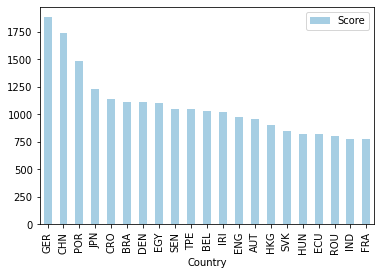

In [135]:
import matplotlib.pyplot as plt

df=week_country_rank(link_per_week_list,5,20)
df.plot(x ='Country', y='Score', kind = 'bar',colormap='Paired')

In [138]:
import plotly.express as px
data = px.data.gapminder()

fig = px.bar(df, x='Country', y='Score',
             hover_data=['Score'], color='Score', height=500)
fig.show()